In [31]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Loading and reading the data
data = pd.read_csv('student-mat.csv')

In [33]:
#Checking the head of the data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [34]:
#dropping the unwanted data attributes
data.drop(['address', 'school', 'age', 'nursery', 'famsize', 'higher', 'failures', 'Mjob', 'romantic', 'Fjob', 'reason', 'goout', 'guardian', 'famsup', 'Dalc', 'Walc', 'G1', 'G2'], axis = 1, inplace=True)

In [35]:
data.head()

,sex,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,paid,activities,internet,famrel,freetime,health,absences,G3
0,F,A,4,4,2,2,yes,no,no,no,4,3,3,6,6
1,F,T,1,1,1,2,no,no,no,yes,5,3,3,4,6
2,F,T,1,1,1,2,yes,yes,no,yes,4,3,3,10,10
3,F,T,4,2,1,3,no,yes,yes,yes,3,2,5,2,15
4,F,T,3,3,1,2,no,yes,no,no,4,3,5,4,10


In [36]:
#Choosing attributes
data_model = data[['sex', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'schoolsup', 'paid', 'activities', 'internet', 'famrel', 'freetime', 'health', 'absences', 'G3']]

In [37]:
data_model.head()

,sex,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,paid,activities,internet,famrel,freetime,health,absences,G3
0,F,A,4,4,2,2,yes,no,no,no,4,3,3,6,6
1,F,T,1,1,1,2,no,no,no,yes,5,3,3,4,6
2,F,T,1,1,1,2,yes,yes,no,yes,4,3,3,10,10
3,F,T,4,2,1,3,no,yes,yes,yes,3,2,5,2,15
4,F,T,3,3,1,2,no,yes,no,no,4,3,5,4,10


In [38]:
#Change to dummy variables
data_dum = pd.get_dummies(data_model)

In [39]:
data_dum.head()

,Medu,Fedu,traveltime,studytime,famrel,freetime,health,absences,G3,sex_F,...,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,paid_no,paid_yes,activities_no,activities_yes,internet_no,internet_yes
0,4,4,2,2,4,3,3,6,6,1,...,1,0,0,1,1,0,1,0,1,0
1,1,1,1,2,5,3,3,4,6,1,...,0,1,1,0,1,0,1,0,0,1
2,1,1,1,2,4,3,3,10,10,1,...,0,1,0,1,0,1,1,0,0,1
3,4,2,1,3,3,2,5,2,15,1,...,0,1,1,0,0,1,0,1,0,1
4,3,3,1,2,4,3,5,4,10,1,...,0,1,1,0,0,1,1,0,1,0


In [40]:
#train test split
from sklearn.model_selection import train_test_split
X = data_dum.drop('G3', axis=1)
y = data_dum.G3.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#sklearn linear regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
linmod = LinearRegression()
linmod.fit(X_train, y_train)


LinearRegression()

In [51]:
np.mean(cross_val_score(linmod,X_train,y_train,scoring  = 'neg_mean_absolute_error', cv = 3))

-3.539785819889174

In [61]:
#lasso regression
linmod_las = Lasso(alpha  = .73)
linmod_las.fit(X_train,y_train)
np.mean(cross_val_score(linmod_las,X_train,y_train,scoring  = 'neg_mean_absolute_error', cv = 3))

-3.3598489769794035

In [46]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    linmodlas = Lasso(alpha = (i/100))
    error.append(np.mean(cross_val_score(linmodlas,X_train,y_train,scoring  = 'neg_mean_absolute_error')))

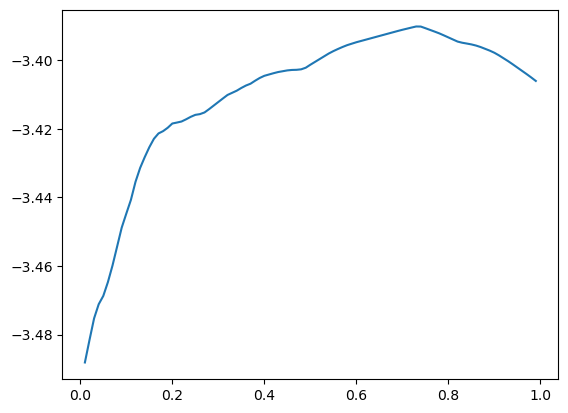

In [47]:
plt.plot(alpha,error)

In [49]:
err =  tuple(zip(alpha, error))
df_error = pd.DataFrame(err, columns = ['alpha', 'error'])
df_error[df_error.error == max(df_error.error)]
                                        
             

,alpha,error
72,0.73,-3.390111


In [54]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring  = 'neg_mean_absolute_error', cv = 3))

-3.271601976639712

In [55]:
#finding the best model
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,100,10), 'criterion':('mae', 'mse'), 'max_features':('auto','sqrt','log2')}

In [56]:
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)
gs.fit(X_train,y_train)

C:\Users\chris\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\chris\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\chris\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\chris\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavio

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mae', 'mse'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [58]:
gs.best_score_

-3.231430368373765

In [59]:
gs.best_estimator_

RandomForestRegressor(criterion='mse', max_features='sqrt', n_estimators=50)

In [62]:
tpred_linmod = linmod.predict(X_test)
tpred_linmod_las = linmod_las.predict(X_test)
tpredrf = gs.best_estimator_.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error

In [64]:
mean_absolute_error(y_test,tpred_linmod)

3.7879160264601164

In [65]:
mean_absolute_error(y_test,tpred_linmod_las)

3.6472600271552107

In [66]:
mean_absolute_error(y_test,tpredrf)

3.68607594936709